# Testing for Normality

- <http://abacus.bates.edu/~ganderso/biology/bio270/homework_files/Data_Transformation.pdf>

-<https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/>


In [3]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


In [4]:
hpi_names=('HPI_Rank','Country','Region','Average_Life_Expectancy','Average_Wellbeing','Happy_Life_Years','Footprint','Inequality_of_Outcomes', 'IA_LifeExpectancy','IA_Wellbeing','HPI_Index','GDPpercapita','Population','GINI_Index')

In [5]:
# read in the csv file:
hpi16 = pd.read_csv('HappyPlanet16.csv', index_col=0, names=hpi_names, header=0)
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [115]:
x= hpi16['Average_Life_Expectancy']

In [116]:
x

0      59.668
1      77.347
2      74.313
3      75.927
        ...  
136    75.477
137    63.340
138    58.409
139    53.673
Name: Average_Life_Expectancy, Length: 140, dtype: float64

In [119]:
k = x.max()+1
k

84.572

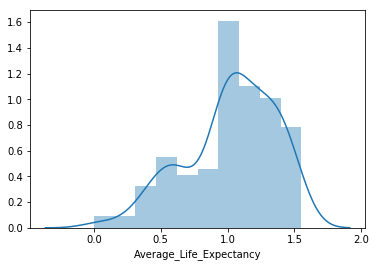

In [121]:
sns.distplot(np.log10(k-x))

# Testing for Normality

In [6]:
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [42]:
x= hpi16['Population']

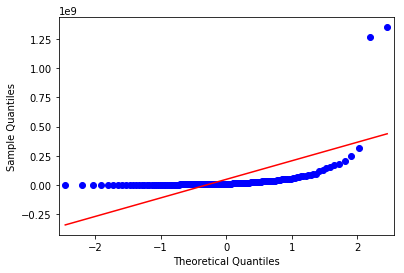

In [43]:

from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# data = 5 * randn(100) + 50
data= x
# q-q plot
qqplot(data, line='s')
pyplot.show()

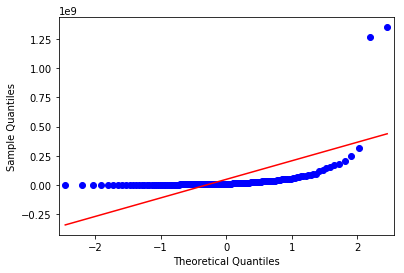

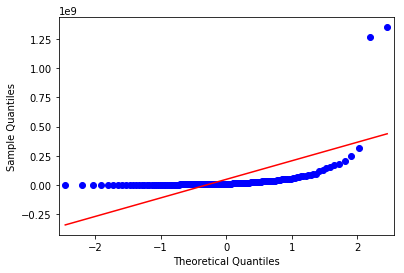

In [44]:
qqplot(data, line='s')

In [45]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.259, p=0.000
Sample does not look Gaussian (reject H0)


In [46]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
data =x
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=227.985, p=0.000
Sample does not look Gaussian (reject H0)


In [47]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
data=x
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 33.476
15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.894, data does not look normal (reject H0)
1.000: 1.063, data does not look normal (reject H0)
